In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Applications/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_pickle("boston_housing.pkl")
print(df.head())  # Check if data is loaded correctly


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


# Handle missing values and outliers

In [4]:
# Check for missing values
print("Missing Values Before Handling:\n", df.isnull().sum())


Missing Values Before Handling:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


 - No missing values to handle

 ## **Handle Outliers**

Dataset shape before outlier removal: (506, 14)


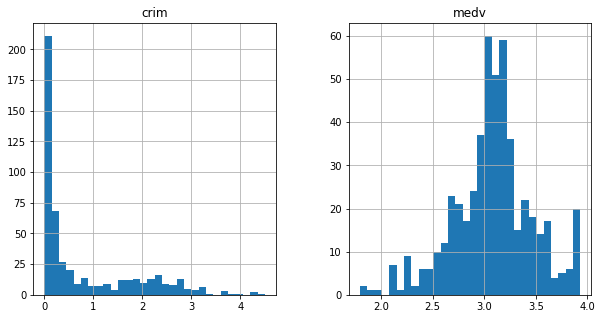

Dataset shape after outlier removal: (506, 14)


In [6]:
print(f"Dataset shape before outlier removal: {df.shape}")
# Apply log transformation to highly skewed variables
df['crim'] = np.log1p(df['crim'])  # log(1 + x) to handle zeros
df['medv'] = np.log1p(df['medv'])  # log transformation to reduce ceiling effect

# Check the transformed distributions
df[['crim', 'medv']].hist(figsize=(10, 5), bins=30)
plt.show()
print(f"Dataset shape after outlier removal: {df.shape}")

In [7]:
# Check for missing values and summary statistics
print("\nFinal Summary Statistics:\n", df.describe())

# Boxplot to check if outliers are reduced
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_with_outliers])
plt.title("Boxplot after Outlier Handling")
plt.show()


Final Summary Statistics:
              crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.813418   11.363636   11.136779    0.069170    0.554695    6.284634   
std      1.022731   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006300    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.078853    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.228336    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      1.542674   12.500000   18.100000    0.000000    0.624000    6.623500   
max      4.499545  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   

NameError: name 'columns_with_outliers' is not defined

<Figure size 864x432 with 0 Axes>

## **Encode categorical variables**
- No Categorical values to encode , the Boston Dataset has only numerical values

## **Normalize/standardize numerical features.**

In [ ]:

from sklearn.preprocessing import StandardScaler

# Select numerical columns (excluding categorical ones)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())  # Check the transformed data



## **Split the data into training and testing sets.**

In [ ]:
from sklearn.model_selection import train_test_split
# Define features (X) and target variable (y)
X = df.drop(columns=['medv'])  # Features (drop the target column)
y = df['medv']  # Target variable (house prices)

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set size: X_test: {X_test.shape}, y_test: {y_test.shape}")


In [ ]:
df.to_csv('processed_data.csv', index=False)